In [17]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

In [9]:
import pandas as pd
import pickle
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split

# ▶ 데이터 불러오기
df = pd.read_csv('피처_43/피처 선택/43_Segment 추가.csv')

# ▶ X, y 분리
X = df.drop(columns=['Segment', 'ID'])
y = df['Segment']

# ▶ train/valid 분리
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [10]:
# ▶ 모델 로드
base_path = '피처_43/catboost/'
model = CatBoostClassifier()
model.load_model(f"{base_path}final_catboost_model.cbm")

# ▶ 컬럼 순서 맞추기 (중요)
X_valid = X_valid[model.feature_names_]

# cat_features 없이 예측 확률
pred_proba = model.predict_proba(X_valid)

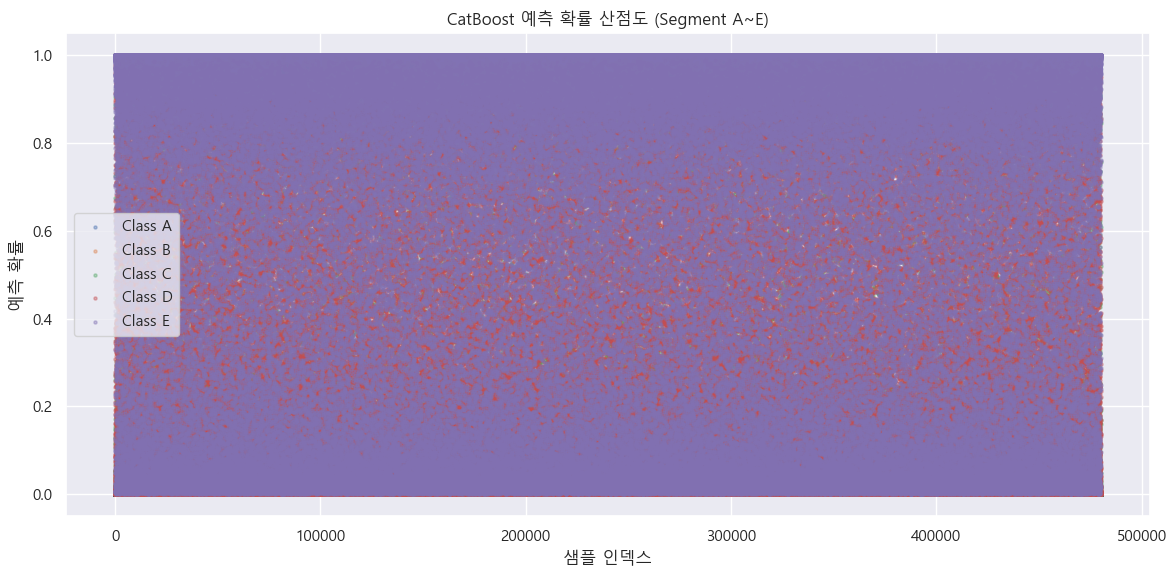

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

# ▶ 클래스 수 추출
n_classes = pred_proba.shape[1]

# ▶ 레이블 복원 (예: 'A' ~ 'E')
with open(f'{base_path}label_encoder.pkl', 'rb') as f:
    le = pickle.load(f)

class_labels = le.inverse_transform(np.arange(n_classes))  # 예: ['A', 'B', 'C', 'D', 'E']

# ▶ 산점도 시각화
plt.figure(figsize=(12, 6))

for i, label in enumerate(class_labels):
    plt.scatter(
        range(len(pred_proba)),
        pred_proba[:, i],
        label=f'Class {label}',
        alpha=0.4,
        s=5
    )

plt.ylim(-0.05, 1.05)
plt.xlabel("샘플 인덱스")
plt.ylabel("예측 확률")
plt.title("CatBoost 예측 확률 산점도 (Segment A~E)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

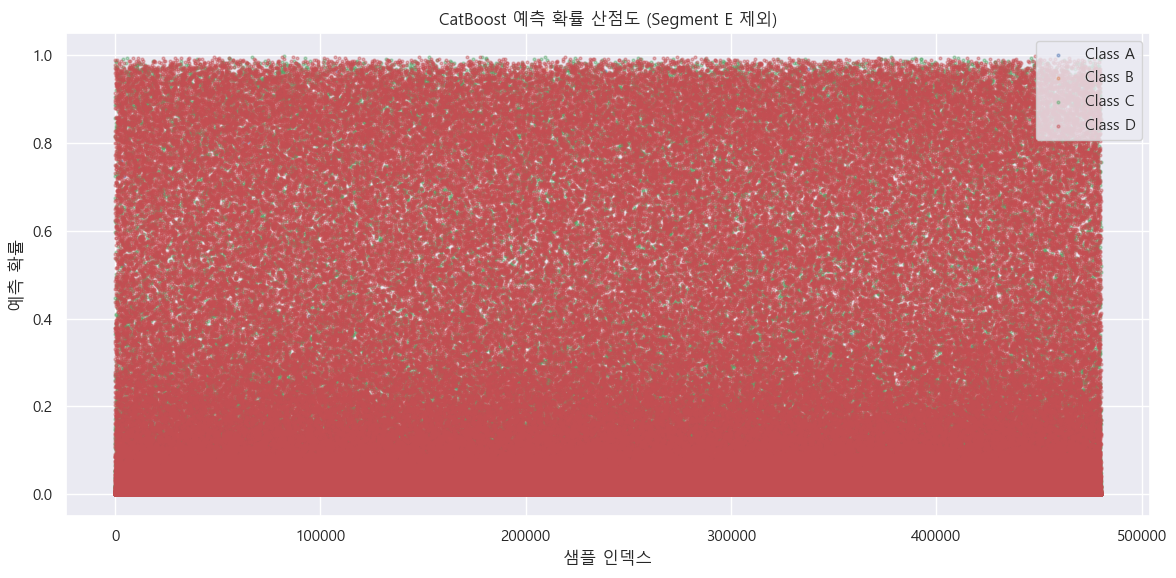

In [20]:
# ▶ E 제외한 클래스 인덱스 추출
exclude_class = 'E'
valid_indices = [i for i, label in enumerate(class_labels) if label != exclude_class]

# ▶ 산점도 시각화 (Segment E 제외)
plt.figure(figsize=(12, 6))

for i in valid_indices:
    label = class_labels[i]
    plt.scatter(
        range(len(pred_proba)),
        pred_proba[:, i],
        label=f'Class {label}',
        alpha=0.4,
        s=4
    )

plt.ylim(-0.05, 1.05)
plt.xlabel("샘플 인덱스")
plt.ylabel("예측 확률")
plt.title("CatBoost 예측 확률 산점도 (Segment E 제외)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
